In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [2]:
sys.path.insert(0, 'D:/spark-brc_gits/swatmf_git/swatmf_pkgs')
import swatmf_viz

In [3]:
base = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base_new_res'
bau = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_bau_new_res'
rd = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_rd_new_res'

In [4]:
os.chdir(base)
a = swatmf_viz.str_df('1/1/2003', 240, 'M')

In [5]:
a

,str_sim
2003-01-31,342.90
2003-02-28,474.00
2003-03-31,499.30
2003-04-30,428.20
2003-05-31,416.50
...,...
2019-08-31,112.10
2019-09-30,88.16
2019-10-31,73.11
2019-11-30,102.60


In [6]:
tot_df = pd.DataFrame()
for i, j in zip([base, bau, rd], ['base', 'bau', 'rd']):
    os.chdir(i)
    df = swatmf_viz.str_df('1/1/2003', 240, 'M')
    df.rename(columns = {'str_sim':j}, inplace = True)
    tot_df = pd.concat([tot_df, df], axis=1,)


In [7]:
str(base)

'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base_new_res'

In [8]:
tot_df

,base,bau,rd
2003-01-31,342.90,341.70,338.00
2003-02-28,474.00,423.00,474.10
2003-03-31,499.30,380.10,497.80
2003-04-30,428.20,408.80,427.30
2003-05-31,416.50,409.50,414.20
...,...,...,...
2019-08-31,112.10,102.20,104.80
2019-09-30,88.16,79.51,81.47
2019-10-31,73.11,68.73,68.40
2019-11-30,102.60,88.10,92.92


In [9]:
mon_df = tot_df.groupby(tot_df.index.month).mean()


In [10]:
mon_df

,base,bau,rd
1,287.429412,277.058824,284.276471
2,433.352941,352.876471,432.047059
3,474.958824,370.664706,473.941176
4,472.135294,403.317647,470.794118
5,356.500000,332.552941,351.558824
6,219.470588,213.294118,212.958824
7,170.976471,182.676471,166.111765
8,146.070588,156.605882,142.870588
9,125.305882,128.748824,121.765294
10,119.374118,122.048235,114.398235


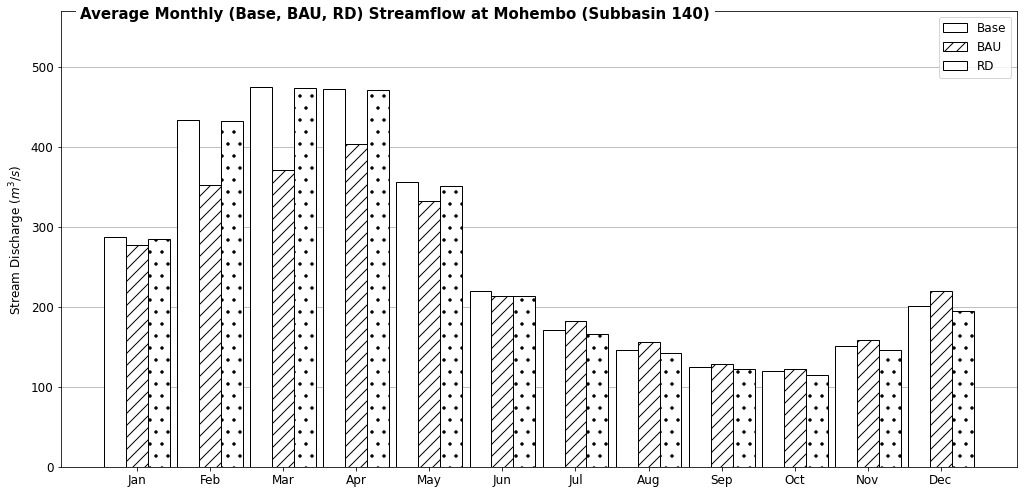

In [11]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(14,7)
                )
# x = date2num(mon_df.index)
w = 0.3
ax.bar(mon_df.index-0.3, mon_df.base, width=w, align='center', label='Base', hatch='', color='white', edgecolor='black', zorder=3)
ax.bar(mon_df.index, mon_df.bau, width=w, align='center', label='BAU', hatch='//', color='white', edgecolor='black', zorder=3)
ax.bar(mon_df.index+0.3, mon_df.rd, width=w, align='center', label='RD', hatch='.', color='white', edgecolor='black', zorder=3)

# for index, value in zip(mon_df.index-0.2, mon_df.base):
#     ax.text(
#         index-0.1, value+10000, '{:3.0f}'.format(value/1000),
#         fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(mon_df.index, mon_df.bau):
#     ax.text(index, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(mon_df.index, mon_df.rd):
#     ax.text(index+0.3, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')


ax.yaxis.set_major_formatter(FuncFormatter(swatmf_viz.y_fmt))


ax.tick_params(axis='both', labelsize=12)
# plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(mon_df.index[::1])
# ax.xaxis_date()
# plt.xticks[1].set_visible(False)
ax.set_xticks(mon_df.index[::1])
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)
ax.margins(y=0.2)
ax.set_title(
    # 'Average Monthly (Base, BAU, RD) Streamflow at Mucundi (Subbasin 137)', # streamflow
    'Average Monthly (Base, BAU, RD) Streamflow at Mohembo (Subbasin 140)', #sed
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
plt.tight_layout()
ax.legend(fontsize=12)
ax.grid(axis='y', zorder=0)
ax.set_ylabel(r'Stream Discharge $(m^3/s)$', fontsize = 12)
# ax.set_ylabel(r'Sediment Yield $(Kiloton/month)$', fontsize = 12)
# plt.savefig('am_mucundi_ff_sed.png', dpi=300, bbox_inches="tight")
plt.show()

In [12]:
base = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_climates/scn_models/base_ssp245-inm-cm5-0'
bau = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_climates/scn_models/bau_ssp245-inm-cm5-0'
rd = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_climates/scn_models/rd_ssp245-inm-cm5-0'

In [13]:
tot_df = pd.DataFrame()
for i, j in zip([base, bau, rd], ['base', 'bau', 'rd']):
    os.chdir(i)
    df = swatmf_viz.str_df('1/1/2020', 240, 'M')
    df.rename(columns = {'str_sim':j}, inplace = True)
    tot_df = pd.concat([tot_df, df], axis=1,)
mon_df = tot_df.groupby(tot_df.index.month).mean()

In [14]:
mon_df

,base,bau,rd
1,229.061290,214.093548,226.819355
2,389.503226,283.558065,388.322581
3,456.300000,331.570968,454.838710
4,422.035484,303.177419,419.612903
5,287.735484,232.977419,282.229032
6,167.303226,156.651613,161.748387
7,130.777419,135.780645,127.325806
8,111.392258,118.100000,106.428065
9,86.601613,94.501290,80.162903
10,77.526129,81.516452,71.581935


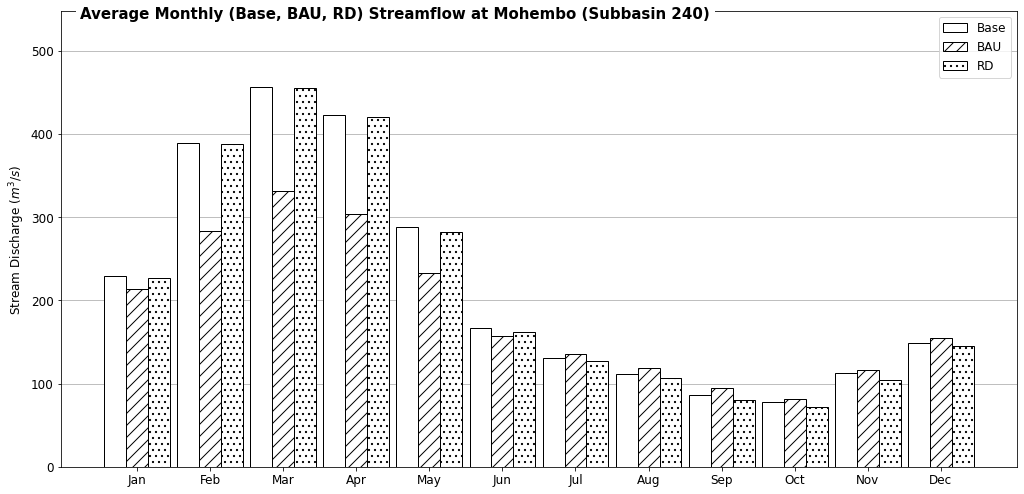

In [15]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(14,7)
                )
# x = date2num(mon_df.index)
w = 0.3
ax.bar(mon_df.index-0.3, mon_df.base, width=w, align='center', label='Base', hatch='', color='white', edgecolor='black', zorder=3)
ax.bar(mon_df.index, mon_df.bau, width=w, align='center', label='BAU', hatch='//', color='white', edgecolor='black', zorder=3)
ax.bar(mon_df.index+0.3, mon_df.rd, width=w, align='center', label='RD', hatch='..', color='white', edgecolor='black', zorder=3)

# for index, value in zip(mon_df.index-0.2, mon_df.base):
#     ax.text(
#         index-0.1, value+10000, '{:3.0f}'.format(value/1000),
#         fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(mon_df.index, mon_df.bau):
#     ax.text(index, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(mon_df.index, mon_df.rd):
#     ax.text(index+0.3, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')


ax.yaxis.set_major_formatter(FuncFormatter(swatmf_viz.y_fmt))


ax.tick_params(axis='both', labelsize=12)
# plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(mon_df.index[::1])
# ax.xaxis_date()
# plt.xticks[1].set_visible(False)
ax.set_xticks(mon_df.index[::1])
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)
ax.margins(y=0.2)
ax.set_title(
    # 'Average Monthly (Base, BAU, RD) Streamflow at Mucundi (Subbasin 137)', # streamflow
    'Average Monthly (Base, BAU, RD) Streamflow at Mohembo (Subbasin 240)', #sed
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
plt.tight_layout()
ax.legend(fontsize=12)
ax.grid(axis='y', zorder=0)
ax.set_ylabel(r'Stream Discharge $(m^3/s)$', fontsize = 12)
# ax.set_ylabel(r'Sediment Yield $(Kiloton/month)$', fontsize = 12)
# plt.savefig('am_mucundi_ff_sed.png', dpi=300, bbox_inches="tight")
plt.show()

In [16]:
wd = 'D:/Projects/Watersheds/Okavango/Data/okavango_org_model/Scenarios/Default/TxtInOut'
os.chdir(wd)

In [17]:
df = swatmf_viz.str_df('1/1/2003', 240, 'M')

In [18]:
scn_wd = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\\scn_models"
os.chdir(scn_wd)

In [19]:
model_list = []
scn_nams = ['ssp245', 'ssp585']
cc_nams = ['fgoals-g3', 'inm-cm5-0', 'miroc6', 'noresm2-lm' , 'ukesm1-0-ll']
model_list = []
for i in scn_nams:
    for j in cc_nams:
        model_list.append('bau_{}-{}'.format(i, j))

In [20]:
cc_nams = ['fgoals-g3', 'inm-cm5-0', 'miroc6', 'noresm2-lm' , 'ukesm1-0-ll']
scn_nams = ['ssp245', 'ssp585']
mod_nams = ['base', 'bau', 'rd']

In [21]:

for i in cc_nams:
    for j in scn_nams:
        model_list = []
        tot_df = pd.DataFrame()
        # tot_df = pd.DataFrame()
        for k in mod_nams:
            model_list.append('{}_{}-{}'.format(k, j, i))
            os.chdir(scn_wd)
            model_paths = [os.path.abspath(name) for name in model_list if os.path.isdir(name)]

            # tot_df = pd.DataFrame()
            for l, m in zip(model_paths, model_list):
                os.chdir(l)
                df = swatmf_viz.str_df('1/1/2020', 240, 'M')
                df.rename(columns = {'str_sim':m}, inplace = True)

                tot_df = pd.concat([tot_df, df], axis=1,)
                os.chdir(scn_wd)
            mon_df = tot_df.groupby(tot_df.index.month).mean()
            print(mon_df)
            print('hi')


    base_ssp245-fgoals-g3
1              170.006452
2              265.187097
3              389.732258
4              330.945161
5              197.064516
6              119.627097
7              105.135161
8               89.690968
9               65.527742
10              55.921613
11              94.439677
12             132.777419
hi
    base_ssp245-fgoals-g3  base_ssp245-fgoals-g3  bau_ssp245-fgoals-g3
1              170.006452             170.006452            157.464516
2              265.187097             265.187097            196.022581
3              389.732258             389.732258            245.764516
4              330.945161             330.945161            218.351613
5              197.064516             197.064516            142.513548
6              119.627097             119.627097            115.005161
7              105.135161             105.135161            109.115161
8               89.690968              89.690968             94.018387
9               65.5

In [22]:
cc_nams = ['fgoals-g3', 'inm-cm5-0', 'miroc6', 'noresm2-lm' , 'ukesm1-0-ll']
scn_nams = ['ssp245', 'ssp585']
mod_nams = ['base', 'bau', 'rd']


model_list = []
for i in cc_nams:
    for j in scn_nams:
        for k in mod_nams:
            model_list.append('{}_{}-{}'.format(k, j, i))
print((model_list))

['base_ssp245-fgoals-g3', 'bau_ssp245-fgoals-g3', 'rd_ssp245-fgoals-g3', 'base_ssp585-fgoals-g3', 'bau_ssp585-fgoals-g3', 'rd_ssp585-fgoals-g3', 'base_ssp245-inm-cm5-0', 'bau_ssp245-inm-cm5-0', 'rd_ssp245-inm-cm5-0', 'base_ssp585-inm-cm5-0', 'bau_ssp585-inm-cm5-0', 'rd_ssp585-inm-cm5-0', 'base_ssp245-miroc6', 'bau_ssp245-miroc6', 'rd_ssp245-miroc6', 'base_ssp585-miroc6', 'bau_ssp585-miroc6', 'rd_ssp585-miroc6', 'base_ssp245-noresm2-lm', 'bau_ssp245-noresm2-lm', 'rd_ssp245-noresm2-lm', 'base_ssp585-noresm2-lm', 'bau_ssp585-noresm2-lm', 'rd_ssp585-noresm2-lm', 'base_ssp245-ukesm1-0-ll', 'bau_ssp245-ukesm1-0-ll', 'rd_ssp245-ukesm1-0-ll', 'base_ssp585-ukesm1-0-ll', 'bau_ssp585-ukesm1-0-ll', 'rd_ssp585-ukesm1-0-ll']


In [23]:
N = 3
mod_group = [model_list[n:n+N] for n in range(0, len(model_list), N)]

In [24]:
for i in mod_group[0]:
    model_paths = [os.path.abspath(name) for name in i if os.path.isdir(name)]

In [25]:
mod_group[0]

['base_ssp245-fgoals-g3', 'bau_ssp245-fgoals-g3', 'rd_ssp245-fgoals-g3']

In [26]:
# tot_df = pd.DataFrame()

for i in mod_group:
    os.chdir(scn_wd)
    model_paths = [os.path.abspath(name) for name in i if os.path.isdir(name)]
    # print(model_paths)
    # print(name)
    tot_df = pd.DataFrame()
    for l, m in zip(model_paths, i):
        os.chdir(l)
        df = swatmf_viz.str_df('1/1/2020', 240, 'M')
        df.rename(columns = {'str_sim':m}, inplace = True)

        tot_df = pd.concat([tot_df, df], axis=1,) 
    mon_df = tot_df.groupby(tot_df.index.month).mean()
    print(mon_df)


    base_ssp245-fgoals-g3  bau_ssp245-fgoals-g3  rd_ssp245-fgoals-g3
1              170.006452            157.464516           167.603226
2              265.187097            196.022581           263.287097
3              389.732258            245.764516           388.738710
4              330.945161            218.351613           327.893548
5              197.064516            142.513548           191.862258
6              119.627097            115.005161           114.715806
7              105.135161            109.115161            98.792581
8               89.690968             94.018387            83.066129
9               65.527742             67.090000            61.361935
10              55.921613             54.920968            52.777419
11              94.439677             90.343871            85.102258
12             132.777419            130.737419           125.490645
    base_ssp585-fgoals-g3  bau_ssp585-fgoals-g3  rd_ssp585-fgoals-g3
1              148.312903         

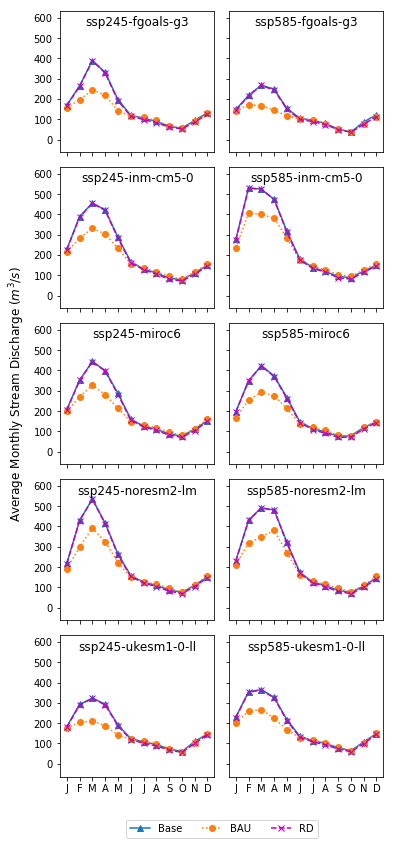

In [27]:
fig, axes = plt.subplots(figsize=(6, 12), nrows=5, ncols=2, sharex=True, sharey=True)
ax1 = fig.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
for ax, i in zip(axes.flat, mod_group):
    os.chdir(scn_wd)
    model_paths = [os.path.abspath(name) for name in i if os.path.isdir(name)]
    # print(model_paths)
    # print(name)
    tot_df = pd.DataFrame()
    for l, m in zip(model_paths, i):
        os.chdir(l)
        df = swatmf_viz.str_df('1/1/2020', 240, 'M')
        df.rename(columns = {'str_sim':m}, inplace = True)

        tot_df = pd.concat([tot_df, df], axis=1,) 
    mon_df = tot_df.groupby(tot_df.index.month).mean()
    ax.plot(mon_df.index, mon_df.iloc[:, 0], marker='^', label="Base")
    ax.plot(mon_df.index, mon_df.iloc[:, 1], marker='o', linestyle='dotted', label="BAU")
    ax.plot(mon_df.index, mon_df.iloc[:, 2], marker='x', linestyle='dashed', c='m', label="RD")
    ax.set_title(m[3:], y=0.85)

    ax.margins(y=0.2)
    ax.set_xticks(mon_df.index[::1])
    month_names = ['J','F','M','A','M','J',
                'J','A','S','O','N','D']
    ax.set_xticklabels(month_names)
ax1.set_ylabel('{}'.format('Average Monthly Stream Discharge $(m^3/s)$'), labelpad=10,  fontsize=12)
lines, labels = fig.axes[0].get_legend_handles_labels()
ax1.legend(
    lines, ['Base', 'BAU', 'RD'], loc = 'upper center', ncol=3,
    bbox_to_anchor=(0.5, -0.05),
    # fontsize=12
    )
# plt.legend()
fig.tight_layout()

plt.show()